### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pd.set_option('display.max_rows', None)

### Loading the dataset

In [4]:
df = pd.read_excel("C:\\Users\\Lenovo\\Downloads\\flight_data (1).xlsx")

### Exploratory Data Analysis

In [5]:
df.head()

,Unnamed: 0,Name,Price,Departure time,Arrival time,Departure Place,Arrival Place,Duration,Flight type
0,0,Air India,"₹ 2,341",07:25,10:15,New Delhi,Chennai,02 hrs 50 mins,Non stop
1,1,Air India,"₹ 2,341",12:45,15:40,New Delhi,Chennai,02 hrs 55 mins,Non stop
2,2,Air India,"₹ 2,343",09:15,15:55,New Delhi,Chennai,06 hrs 40 mins,1 stop via Bengaluru
3,3,Spicejet,"₹ 2,343",08:20,15:55,New Delhi,Chennai,07 hrs 35 mins,1 stop via Bengaluru
4,4,Spicejet,"₹ 2,343",06:10,15:55,New Delhi,Chennai,09 hrs 45 mins,1 stop via Bengaluru


In [6]:
df.shape

(7990, 9)

In [7]:
df.columns

Index(['Unnamed: 0', 'Name', 'Price', 'Departure time', 'Arrival time',
       'Departure Place', 'Arrival Place', 'Duration', 'Flight type'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7990 entries, 0 to 7989
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       7990 non-null   int64 
 1   Name             7990 non-null   object
 2   Price            7990 non-null   object
 3   Departure time   7990 non-null   object
 4   Arrival time     7990 non-null   object
 5   Departure Place  7990 non-null   object
 6   Arrival Place    7990 non-null   object
 7   Duration         7990 non-null   object
 8   Flight type      7990 non-null   object
dtypes: int64(1), object(8)
memory usage: 561.9+ KB


In [9]:
#checking null values
df.isnull().sum()

Unnamed: 0         0
Name               0
Price              0
Departure time     0
Arrival time       0
Departure Place    0
Arrival Place      0
Duration           0
Flight type        0
dtype: int64

### Data Pre-Processing

In [10]:
# Extracting Hours for Departure time
df["Dep_hour"] = pd.to_datetime(df["Departure time"]).dt.hour

# Extracting Minutes for Departure time
df["Dep_min"] = pd.to_datetime(df["Departure time"]).dt.minute

In [11]:
# Extracting Hours for Arrival time
df["Arr_hour"] = pd.to_datetime(df["Arrival time"]).dt.hour

# Extracting Minutes for Arrival time
df["Arr_min"] = pd.to_datetime(df["Arrival time"]).dt.minute

---> Converting 'Duration'

We know that the 'Duration' is the difference betwwen 'Departure Time' and 'Arrival time'

In [12]:
df['Duration'] = df['Duration'].str.replace('hrs',':')
df['Duration'] = df['Duration'].str.replace('hr',':')
df['Duration'] = df['Duration'].str.replace('mins','')
df['Duration'] = df['Duration'].str.replace(' ','')

In [13]:
# Extracting Hours for Arrival time
df["Dur_hour"] = pd.to_datetime(df["Duration"]).dt.hour

# Extracting Minutes for Arrival time
df["Dur_min"] = pd.to_datetime(df["Duration"]).dt.minute

In [14]:
df.head()

,Unnamed: 0,Name,Price,Departure time,Arrival time,Departure Place,Arrival Place,Duration,Flight type,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hour,Dur_min
0,0,Air India,"₹ 2,341",07:25,10:15,New Delhi,Chennai,02:50,Non stop,7,25,10,15,2,50
1,1,Air India,"₹ 2,341",12:45,15:40,New Delhi,Chennai,02:55,Non stop,12,45,15,40,2,55
2,2,Air India,"₹ 2,343",09:15,15:55,New Delhi,Chennai,06:40,1 stop via Bengaluru,9,15,15,55,6,40
3,3,Spicejet,"₹ 2,343",08:20,15:55,New Delhi,Chennai,07:35,1 stop via Bengaluru,8,20,15,55,7,35
4,4,Spicejet,"₹ 2,343",06:10,15:55,New Delhi,Chennai,09:45,1 stop via Bengaluru,6,10,15,55,9,45


We can see that   'Departure time', 'Arrival time', 'Duration' are converted to timestamps and the new columns that we have created are added to the dataset.

<br><br>Dropping  'Departure time', 'Arrival time', 'Duration' columns as we have created timestamps for the required info from these columns

In [15]:
df.drop(["Departure time"], axis = 1, inplace = True)
df.drop(["Arrival time"], axis = 1, inplace = True)
df.drop(["Duration"], axis = 1, inplace = True)

In [16]:
# dropping 'Unnamed: 0' column
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [17]:
# checking the names of the columns that are available now
df.columns

Index(['Name', 'Price', 'Departure Place', 'Arrival Place', 'Flight type',
       'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min', 'Dur_hour', 'Dur_min'],
      dtype='object')

### Categorical data


In [18]:
df["Name"].value_counts()

IndiGo                 3435
Go First               1451
Air India              1137
Spicejet                867
AirAsia                 561
Vistara                 491
Go First, Air India      40
Air India, AirAsia        4
Go First, AirAsia         4
Name: Name, dtype: int64

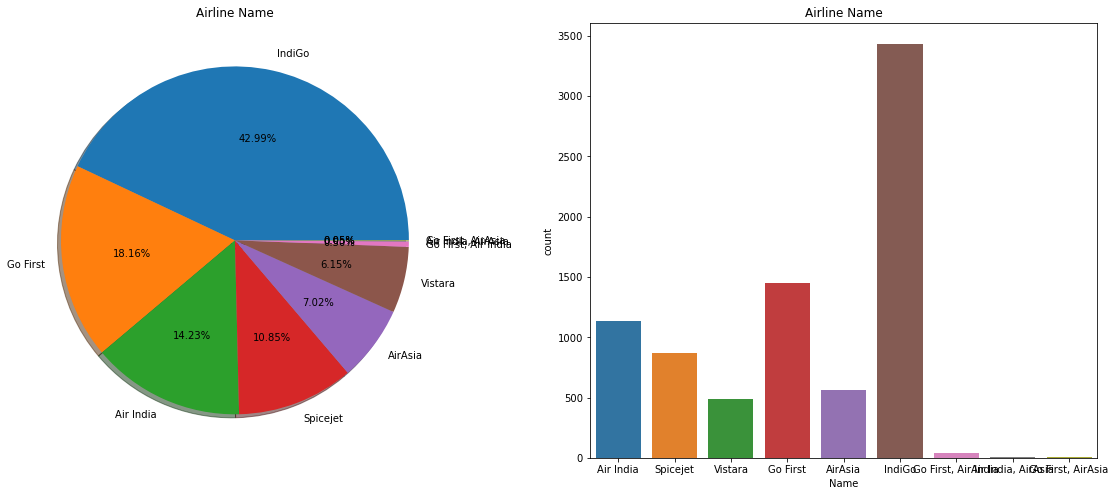

In [19]:
f,ax=plt.subplots(1,2,figsize=(20,8))
df['Name'].value_counts().plot.pie(autopct='%2.2f%%',ax=ax[0],shadow=True)
ax[0].set_title('Airline Name')
ax[0].set_ylabel('')
sns.countplot('Name',data=df,ax=ax[1])
ax[1].set_title('Airline Name')
plt.show()

In [20]:
df["Departure Place"].value_counts()

New Delhi     1736
Mumbai        1587
Bengaluru     1480
Chennai       1024
Ahmedabad      752
Pune           656
Kolkata        256
Madurai        253
Coimbatore     246
Name: Departure Place, dtype: int64

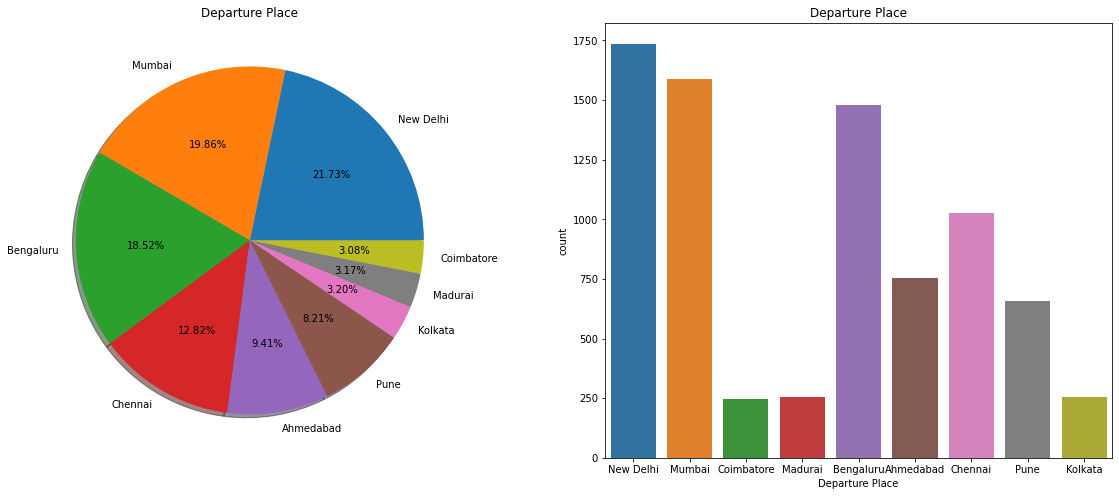

In [21]:
f,ax=plt.subplots(1,2,figsize=(20,8))
df['Departure Place'].value_counts().plot.pie(autopct='%2.2f%%',ax=ax[0],shadow=True)
ax[0].set_title('Departure Place')
ax[0].set_ylabel('')
sns.countplot('Departure Place',data=df,ax=ax[1])
ax[1].set_title('Departure Place')
plt.show()

In [22]:
df["Arrival Place"].value_counts()

New Delhi    1024
Mumbai       1024
Pune         1024
Hyderabad    1024
Chennai      1011
Goa          1008
Bengaluru     912
Kolkata       906
Jaipur         57
Name: Arrival Place, dtype: int64

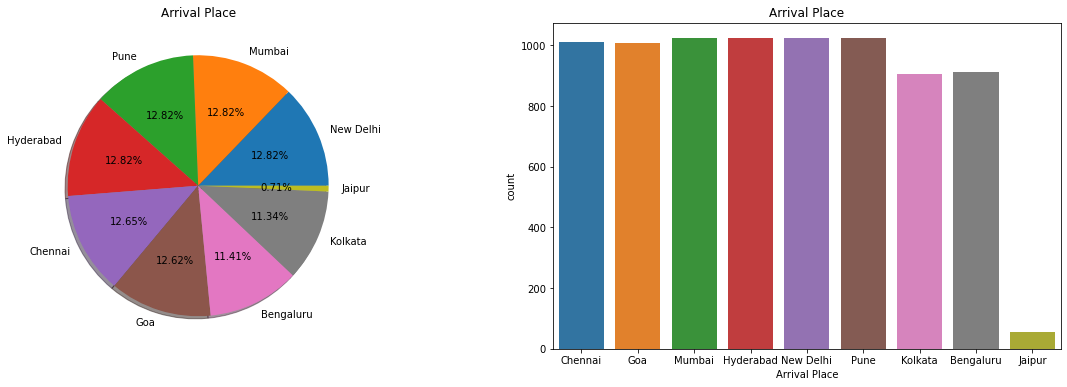

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,6))
df['Arrival Place'].value_counts().plot.pie(autopct='%2.2f%%',ax=ax[0],shadow=True)
ax[0].set_title('Arrival Place')
ax[0].set_ylabel('')
sns.countplot('Arrival Place',data=df,ax=ax[1])
ax[1].set_title('Arrival Place')
plt.show()

In [24]:
df["Flight type"].value_counts()

Non stop                       5082
1 stop via Bengaluru            645
1 stop via Hyderabad            626
1 stop via Patna                330
1 stop via Mumbai               276
1 stop via Chennai              226
1 stop via Pune                 145
1 stop via Raipur               145
1 stop via Bhopal               120
2 stop via Hyderabad,Mysore      80
1 stop via Bhubaneswar           40
1 stop via Nagpur                40
1 stop via Surat                 40
1 stop via Hubli                 40
1 stop via Chandigarh            40
1 stop via Nasik                 40
1 stop via New Delhi             39
1 stop via Indore                36
Name: Flight type, dtype: int64

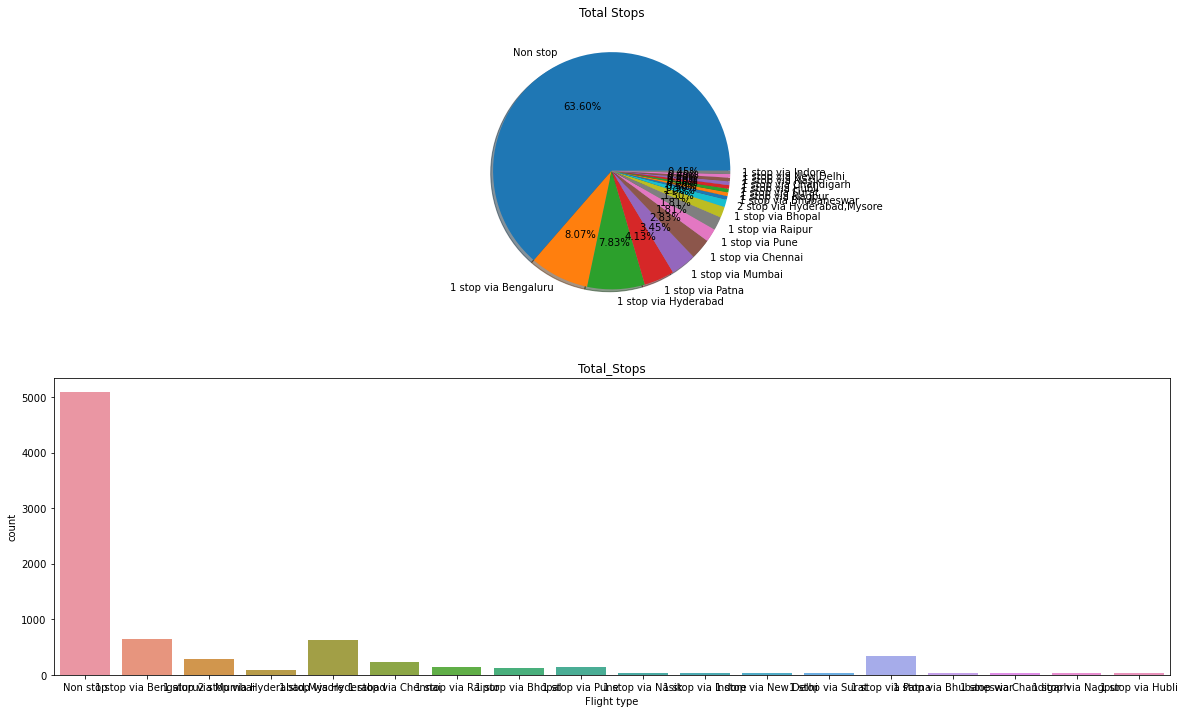

In [25]:
f,ax=plt.subplots(2,1,figsize=(20,12))
df['Flight type'].value_counts().plot.pie(autopct='%2.2f%%',ax=ax[0],shadow=True)
ax[0].set_title('Total Stops')
ax[0].set_ylabel('')
sns.countplot('Flight type',data=df ,ax=ax[1])
ax[1].set_title('Total_Stops')
plt.show()

**Encoding the Nominal Categorical data**

In [26]:
# As Airline Name is Nominal Categorical data we will perform OneHotEncoding

Name = df[["Name"]]

Name = pd.get_dummies(Name, drop_first= True)

Name.head()

,"Name_Air India, AirAsia",Name_AirAsia,Name_Go First,"Name_Go First, Air India","Name_Go First, AirAsia",Name_IndiGo,Name_Spicejet,Name_Vistara
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0


In [27]:
df = df.rename(columns = {'Departure Place':'Departure_Place', "Arrival Place": 'Arrival_Place', 'Flight type': 'total_stops'}, inplace = False)

In [28]:
df.head()

,Name,Price,Departure_Place,Arrival_Place,total_stops,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hour,Dur_min
0,Air India,"₹ 2,341",New Delhi,Chennai,Non stop,7,25,10,15,2,50
1,Air India,"₹ 2,341",New Delhi,Chennai,Non stop,12,45,15,40,2,55
2,Air India,"₹ 2,343",New Delhi,Chennai,1 stop via Bengaluru,9,15,15,55,6,40
3,Spicejet,"₹ 2,343",New Delhi,Chennai,1 stop via Bengaluru,8,20,15,55,7,35
4,Spicejet,"₹ 2,343",New Delhi,Chennai,1 stop via Bengaluru,6,10,15,55,9,45


In [29]:
# As Departure Place is Nominal Categorical data we will perform OneHotEncoding

Source = df[["Departure_Place"]]

Source = pd.get_dummies(df['Departure_Place'], drop_first= True)

Source.head()

,Bengaluru,Chennai,Coimbatore,Kolkata,Madurai,Mumbai,New Delhi,Pune
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0


In [30]:
# As Arrival Place is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Arrival_Place"]]

Destination = pd.get_dummies(df['Arrival_Place'], drop_first= True)

Destination.head()

,Chennai,Goa,Hyderabad,Jaipur,Kolkata,Mumbai,New Delhi,Pune
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


### Ordinal Categorical data

--->Total_Stops

In [31]:
df["total_stops"].value_counts()

Non stop                       5082
1 stop via Bengaluru            645
1 stop via Hyderabad            626
1 stop via Patna                330
1 stop via Mumbai               276
1 stop via Chennai              226
1 stop via Pune                 145
1 stop via Raipur               145
1 stop via Bhopal               120
2 stop via Hyderabad,Mysore      80
1 stop via Bhubaneswar           40
1 stop via Nagpur                40
1 stop via Surat                 40
1 stop via Hubli                 40
1 stop via Chandigarh            40
1 stop via Nasik                 40
1 stop via New Delhi             39
1 stop via Indore                36
Name: total_stops, dtype: int64

In [32]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df.replace({"Non stop": 0, "1 stop via Bengaluru": 1, "1 stop via Hyderabad": 2, "1 stop via Patna": 3,
        "1 stop via Mumbai": 4, "1 stop via Chennai": 5, "1 stop via Raipur" :6,
            "1 stop via Pune": 7, "1 stop via Bhopal": 8, "2 stop via Hyderabad,Mysore":9,
             "1 stop via Surat" : 10, "1 stop via Hubli" :11, '1 stop via Nasik' :12,
            "1 stop via Chandigarh":13, "1 stop via Bhubaneswar": 14, "1 stop via Nagpur":15,
            "1 stop via New Delhi":16, "1 stop via Indore":17}, inplace = True)

In [33]:
# removing ₹ from Price column and changing it to int type
for i in range(0,7990):
    df["Price"][i] =df["Price"][i].replace("₹", "").replace(",", "")
    
    
df["Price"] =  pd.to_numeric(df["Price"])

In [34]:
# Concatenate dataframe --> train_data + Airline + Source + Destination+Price

df_train = pd.concat([df, Name, Source, Destination, df['Price']], axis = 1)

In [35]:
df_train.head()

,Name,Price,Departure_Place,Arrival_Place,total_stops,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hour,Dur_min,"Name_Air India, AirAsia",Name_AirAsia,Name_Go First,"Name_Go First, Air India","Name_Go First, AirAsia",Name_IndiGo,Name_Spicejet,Name_Vistara,Bengaluru,Chennai,Coimbatore,Kolkata,Madurai,Mumbai,New Delhi,Pune,Chennai,Goa,Hyderabad,Jaipur,Kolkata,Mumbai,New Delhi,Pune,Price
0,Air India,2341,New Delhi,Chennai,0,7,25,10,15,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2341
1,Air India,2341,New Delhi,Chennai,0,12,45,15,40,2,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2341
2,Air India,2343,New Delhi,Chennai,1,9,15,15,55,6,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2343
3,Spicejet,2343,New Delhi,Chennai,1,8,20,15,55,7,35,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2343
4,Spicejet,2343,New Delhi,Chennai,1,6,10,15,55,9,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2343


Now, we can see that the data is encoded and the new column that we have created are added to the dataset.<br><br> Dropping "Name", "Departure_Place", "Arrival_Place" as new columns with encoded data has been added.

In [36]:
df_train.drop(["Name", "Departure_Place", "Arrival_Place"], axis = 1, inplace = True)

In [37]:
df_train.head()

,Price,total_stops,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hour,Dur_min,"Name_Air India, AirAsia",Name_AirAsia,Name_Go First,"Name_Go First, Air India","Name_Go First, AirAsia",Name_IndiGo,Name_Spicejet,Name_Vistara,Bengaluru,Chennai,Coimbatore,Kolkata,Madurai,Mumbai,New Delhi,Pune,Chennai,Goa,Hyderabad,Jaipur,Kolkata,Mumbai,New Delhi,Pune,Price
0,2341,0,7,25,10,15,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2341
1,2341,0,12,45,15,40,2,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2341
2,2343,1,9,15,15,55,6,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2343
3,2343,1,8,20,15,55,7,35,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2343
4,2343,1,6,10,15,55,9,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2343


Now all the data is encoded. We can create the model.

**Correlation**

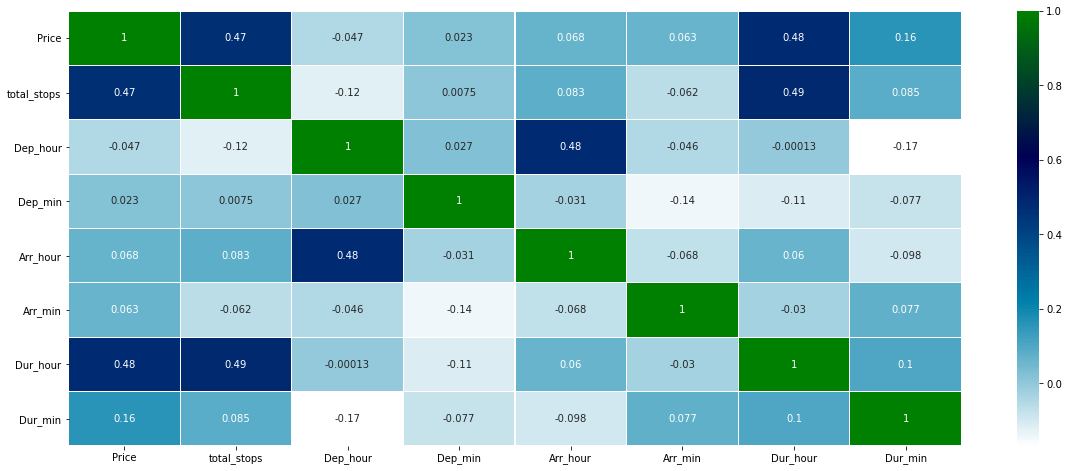

In [38]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),linewidths=.1,cmap="ocean_r", annot=True)
plt.yticks(rotation=0);

**Statistical Description**

In [39]:
df_train.describe()

,Price,total_stops,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hour,Dur_min,"Name_Air India, AirAsia",Name_AirAsia,Name_Go First,"Name_Go First, Air India","Name_Go First, AirAsia",Name_IndiGo,Name_Spicejet,Name_Vistara,Bengaluru,Chennai,Coimbatore,Kolkata,Madurai,Mumbai,New Delhi,Pune,Chennai,Goa,Hyderabad,Jaipur,Kolkata,Mumbai,New Delhi,Pune,Price
count,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000
mean,2746.494743,1.617272,11.276596,27.088235,13.027284,26.623905,3.352315,26.717146,0.000501,0.070213,0.181602,0.005006,0.000501,0.429912,0.108511,0.061452,0.185232,0.128160,0.030788,0.032040,0.031665,0.198623,0.217272,0.082103,0.126533,0.126158,0.128160,0.007134,0.113392,0.128160,0.128160,0.128160,2746.494743
std,849.270054,3.171558,5.947687,17.693489,6.070393,17.364914,3.140177,16.741505,0.022370,0.255521,0.385540,0.070582,0.022370,0.495094,0.311044,0.240172,0.388510,0.334289,0.172755,0.176117,0.175116,0.398989,0.412415,0.274538,0.332470,0.332048,0.334289,0.084166,0.317091,0.334289,0.334289,0.334289,849.270054
min,1552.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1552.000000
25%,2111.000000,0.000000,6.000000,10.000000,8.000000,10.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2111.000000
50%,2482.000000,0.000000,9.000000,30.000000,13.000000,30.000000,2.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2482.000000
75%,3238.500000,2.000000,17.000000,45.000000,19.000000,40.000000,5.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3238.500000
max,5776.000000,17.000000,23.000000,55.000000,23.000000,55.000000,18.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5776.000000


### Predictive Modelling

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import GridSearchCV

In [41]:
df_train.shape

(7990, 33)

In [42]:
df_train.columns

Index(['Price', 'total_stops', 'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min',
       'Dur_hour', 'Dur_min', 'Name_Air India, AirAsia', 'Name_AirAsia',
       'Name_Go First', 'Name_Go First, Air India', 'Name_Go First, AirAsia',
       'Name_IndiGo', 'Name_Spicejet', 'Name_Vistara', 'Bengaluru', 'Chennai',
       'Coimbatore', 'Kolkata', 'Madurai', 'Mumbai', 'New Delhi', 'Pune',
       'Chennai', 'Goa', 'Hyderabad', 'Jaipur', 'Kolkata', 'Mumbai',
       'New Delhi', 'Pune', 'Price'],
      dtype='object')

In [43]:
X = df_train.loc[:, [ 'total_stops', 'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min',
       'Dur_hour', 'Dur_min', 'Name_Air India, AirAsia', 'Name_AirAsia',
       'Name_Go First', 'Name_Go First, Air India', 'Name_Go First, AirAsia',
       'Name_IndiGo', 'Name_Spicejet', 'Name_Vistara', 'Bengaluru', 'Chennai',
       'Coimbatore', 'Kolkata', 'Madurai', 'Mumbai', 'New Delhi', 'Pune',
       'Chennai', 'Goa', 'Hyderabad', 'Jaipur', 'Kolkata', 'Mumbai',
       'New Delhi', 'Pune', 'Price']]
X.head()

,total_stops,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hour,Dur_min,"Name_Air India, AirAsia",Name_AirAsia,Name_Go First,"Name_Go First, Air India","Name_Go First, AirAsia",Name_IndiGo,Name_Spicejet,Name_Vistara,Bengaluru,Chennai,Chennai,Coimbatore,Kolkata,Kolkata,Madurai,Mumbai,Mumbai,New Delhi,New Delhi,Pune,Pune,Chennai,Chennai,Goa,Hyderabad,Jaipur,Kolkata,Kolkata,Mumbai,Mumbai,New Delhi,New Delhi,Pune,Pune,Price,Price
0,0,7,25,10,15,2,50,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2341,2341
1,0,12,45,15,40,2,55,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2341,2341
2,1,9,15,15,55,6,40,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2343,2343
3,1,8,20,15,55,7,35,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2343,2343
4,1,6,10,15,55,9,45,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2343,2343


In [44]:
y = df_train.iloc[:, 0]
y.head()

0    2341
1    2341
2    2343
3    2343
4    2343
Name: Price, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Linear Regression Model

In [46]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(solver='liblinear')
model_log.fit(X_train, y_train)
prediction_log = model_log.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction_log, y_test))

The accuracy of the Logistic Regression is 0.9668335419274092


In [54]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

Coefficients:  [ 1.38042031e-13 -2.87547763e-14 -1.31733274e-15  5.38848480e-15
  1.15510899e-15 -1.41076387e-13 -6.64138883e-15  8.72941152e-13
  5.43390546e-13  1.97046867e-13  1.30657800e-12  2.75426519e-12
  1.59944059e-13  9.58558345e-14  1.14463895e-13  2.23245236e-12
  1.17671517e-12 -9.71661038e-14  2.11293631e-12  3.06491096e-14
 -1.10734272e-12  2.72064946e-13  8.25284296e-13 -7.72162418e-14
  5.24916109e-13 -4.47453777e-13  8.02191328e-13 -2.43354802e-13
  1.17671775e-12 -9.71664155e-14 -1.16716231e-12 -4.86868168e-14
 -5.24329512e-13  3.06489809e-14 -1.10734276e-12  8.25284336e-13
 -7.72163366e-14  5.24916014e-13 -4.47453879e-13  8.02191131e-13
 -2.43355290e-13  5.00000000e-01  5.00000000e-01]
Variance score: 1.0


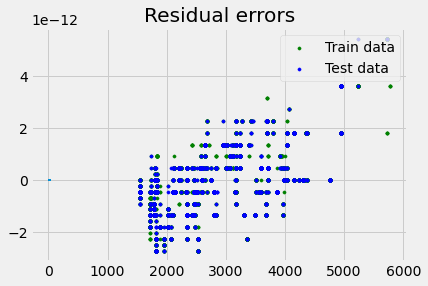

In [55]:
# regression coefficients
print('Coefficients: ', lm.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(lm.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

In [56]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [57]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

-5.002220859751105e-12
[ 1.38042031e-13 -2.87547763e-14 -1.31733274e-15  5.38848480e-15
  1.15510899e-15 -1.41076387e-13 -6.64138883e-15  8.72941152e-13
  5.43390546e-13  1.97046867e-13  1.30657800e-12  2.75426519e-12
  1.59944059e-13  9.58558345e-14  1.14463895e-13  2.23245236e-12
  1.17671517e-12 -9.71661038e-14  2.11293631e-12  3.06491096e-14
 -1.10734272e-12  2.72064946e-13  8.25284296e-13 -7.72162418e-14
  5.24916109e-13 -4.47453777e-13  8.02191328e-13 -2.43354802e-13
  1.17671775e-12 -9.71664155e-14 -1.16716231e-12 -4.86868168e-14
 -5.24329512e-13  3.06489809e-14 -1.10734276e-12  8.25284336e-13
 -7.72163366e-14  5.24916014e-13 -4.47453879e-13  8.02191131e-13
 -2.43355290e-13  5.00000000e-01  5.00000000e-01]


In [58]:
y_pred = regressor.predict(X_test)

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 8.92704905964229e-13
MSE: 1.3635798051425615e-24
RMSE: 1.1677241990909331e-12


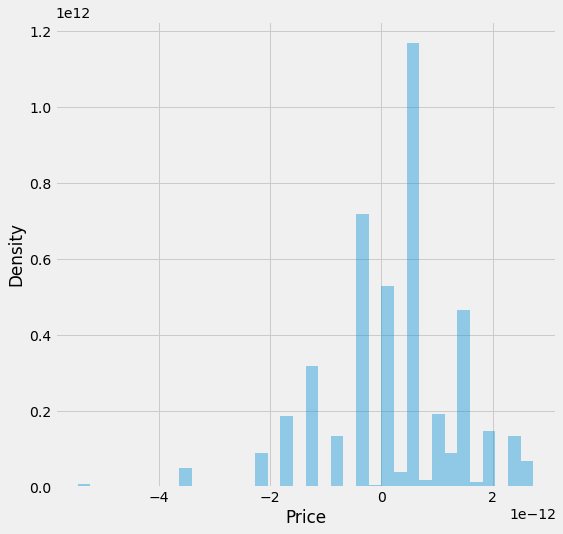

In [61]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-y_pred)
plt.show()

In [100]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
4953,2520,2520.0
5464,1715,1715.0
7487,2126,2126.0
7608,2125,2125.0
2653,1830,1830.0
4623,3702,3702.0
1087,3988,3988.0
3837,2518,2518.0
4112,2463,2463.0
1783,4026,4026.0


### Random Forest Model

In [63]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)

In [64]:
y_pred = reg_rf.predict(X_test)

In [65]:
reg_rf.score(X_train, y_train)

0.9999998585639498

In [66]:
reg_rf.score(X_test, y_test)

0.9999986576417182

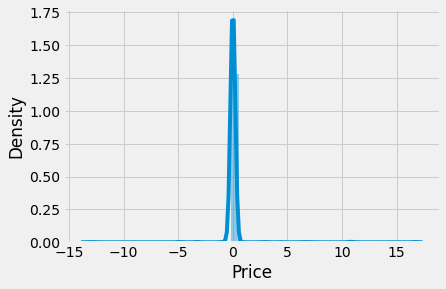

In [67]:
sns.distplot(y_test-y_pred)
plt.show()

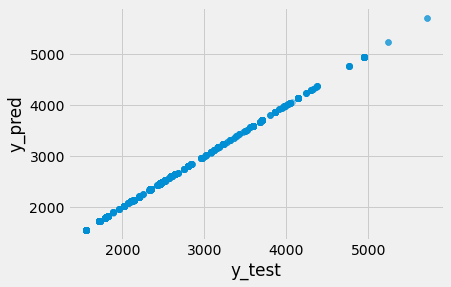

In [68]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [69]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.08637672090112625
MSE: 0.9066258448060094
RMSE: 0.9521690211333329


In [70]:

# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.4949220880681819

In [71]:
metrics.r2_score(y_test, y_pred)

0.9999986576417182

**Important features using ExtraTreesRegressor**

In [72]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [73]:
print(selection.feature_importances_)

[4.03481392e-03 7.62282748e-05 4.53906951e-05 3.80388462e-05
 1.88130448e-05 1.45325332e-04 1.19554902e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.20521129e-08 0.00000000e+00 0.00000000e+00 1.45938092e-04
 6.90360855e-05 1.05124471e-05 1.98289557e-05 2.62164173e-05
 9.34266234e-03 2.46047491e-05 3.21032769e-04 1.73802532e-05
 1.62079922e-04 2.74593856e-04 3.09291713e-03 7.26233694e-04
 3.58792492e-05 2.79579146e-05 2.81265230e-04 7.78062750e-05
 7.87755651e-06 1.05552551e-03 6.67978734e-03 2.88610309e-04
 1.87386848e-05 2.23825024e-04 1.03563868e-03 1.89315810e-03
 3.05827964e-04 5.37286308e-01 4.32070550e-01]


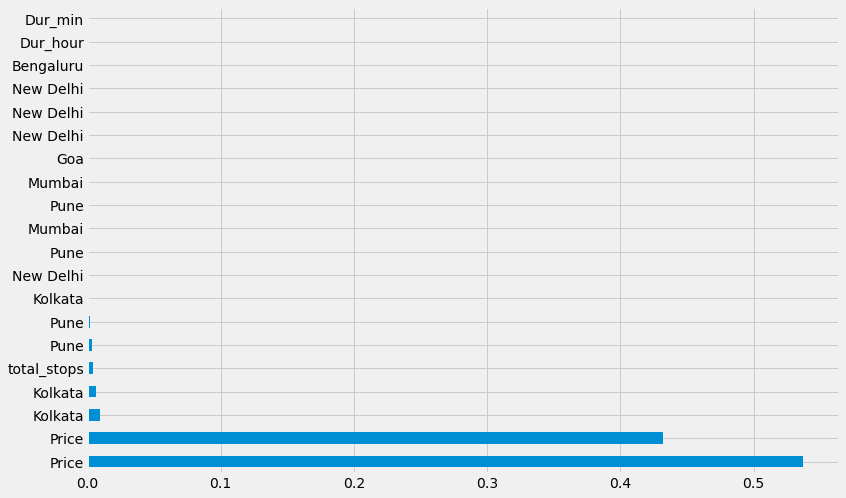

In [74]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Hyper Parameter Tuning

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [77]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [78]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [79]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   9.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  10.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [80]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [81]:
prediction = rf_random.predict(X_test)

In [82]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.0973402805559119
MSE: 0.8691632192061807
RMSE: 0.9322892358094567


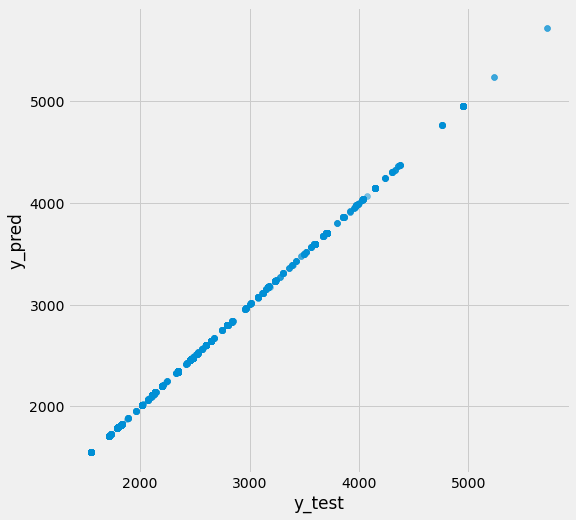

In [83]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### Predictions

In [91]:
OutputDF=pd.DataFrame({'Actual Data':y_test,'Predicted Data':prediction})
OutputDF.head()

,Actual Data,Predicted Data
4953,2520,2520.0
5464,1715,1715.0
7487,2126,2126.0
7608,2125,2125.0
2653,1830,1830.0


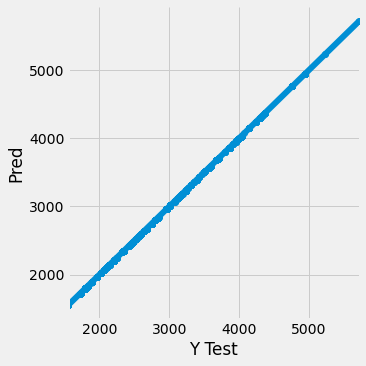

In [92]:
OutputDF = pd.DataFrame({'Y Test':y_test , 'Pred':prediction},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=OutputDF,palette='rainbow')

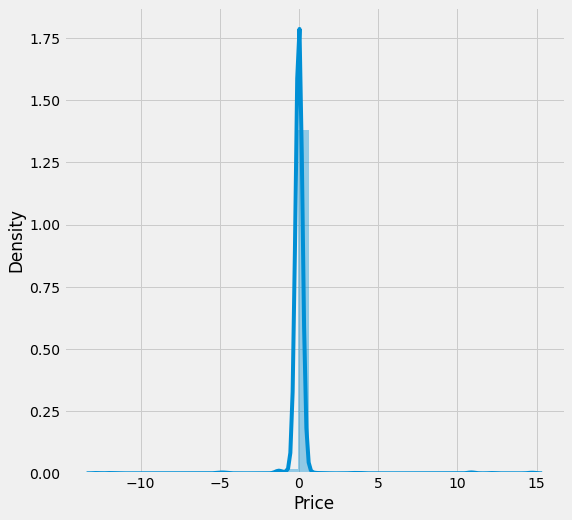

In [93]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

### Saving the Model

In [94]:
import joblib

In [95]:
joblib.dump(reg_rf, 'flight_price_prediction_new.pkl')

['flight_price_prediction_new.pkl']

In [96]:
# Load the model from the file
reg_rf_from_joblib = joblib.load('flight_price_prediction_new.pkl')

In [97]:
# Use the loaded model to make predictions
reg_rf_from_joblib.predict(X_test)

array([2520., 1715., 2126., ..., 2463., 2202., 2600.])